# Acc 1 Stock Performance Tracker


## Setup


In [1]:
import contextlib

import pandas as pd

import const
import draw_utils
import process_utils

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [3]:
acc_name = const.ACC1_NAME
user_name_l = const.ACC_USER_DICT[acc_name]
compare_index = const.VNI_NAME


## Prepare Dataframe


In [4]:
log_df, cf_df = process_utils.prepare_log_df_cf_df(
    acc_user_dict={
        acc_name_key: user_name_l
        for acc_name_key, user_name_l in const.ACC_USER_DICT.items()
        if acc_name_key == acc_name
    },
    acc_combined_name=None,
    index_name_l=[compare_index],
    index_combined_name=None,
)


In [5]:
user_df = process_utils.get_user_df(
    log_df,
    cf_df,
    acc_name=acc_name,
    user_name_l=user_name_l,
    index_name=compare_index,
)


## Charts


### NAV


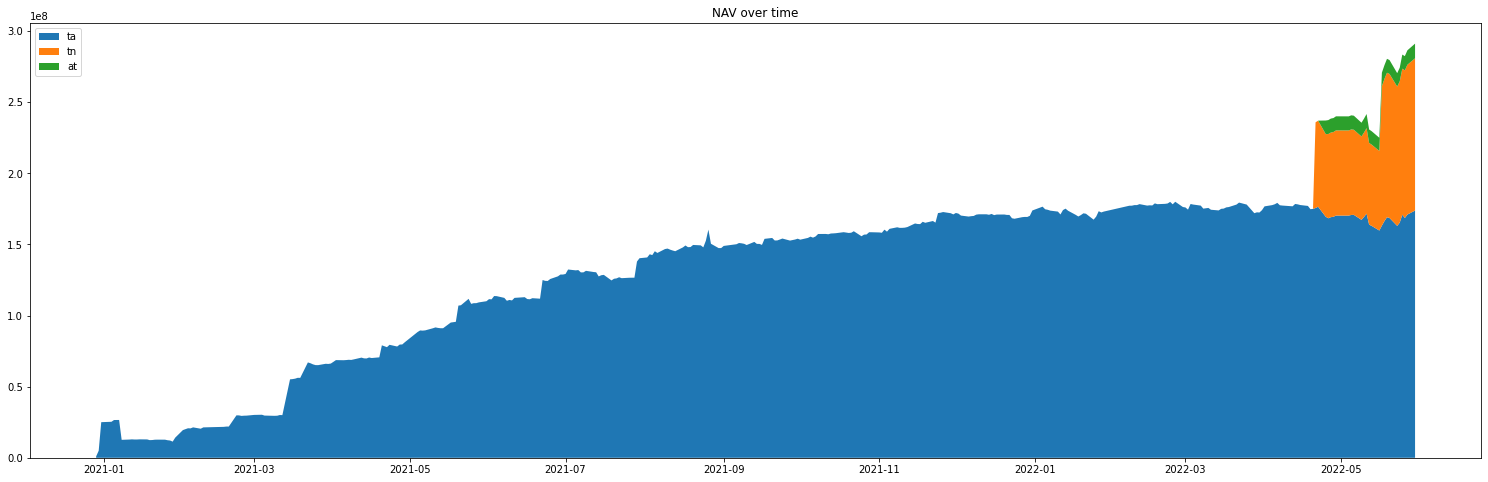

In [6]:
y_list = [user_df[user_name] for user_name in user_name_l]

draw_utils.plot_nav_stackplot(
    x=user_df.index,  # type: ignore
    y=y_list,
    labels=user_name_l,
)


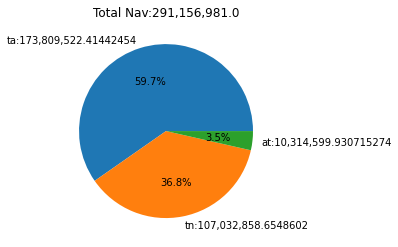

In [7]:
nav_l = [user_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)


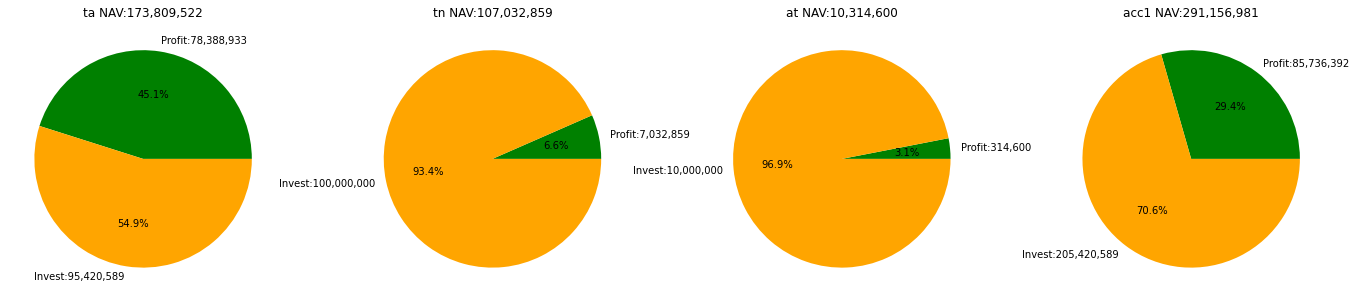

In [8]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in user_name_l + [acc_name]:
    nav = user_df[name].iloc[-1]
    invest = -user_df[f"{name}_cf"].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))
draw_utils.plot_profit_invest_pies(profit_invest_list)


### Recent


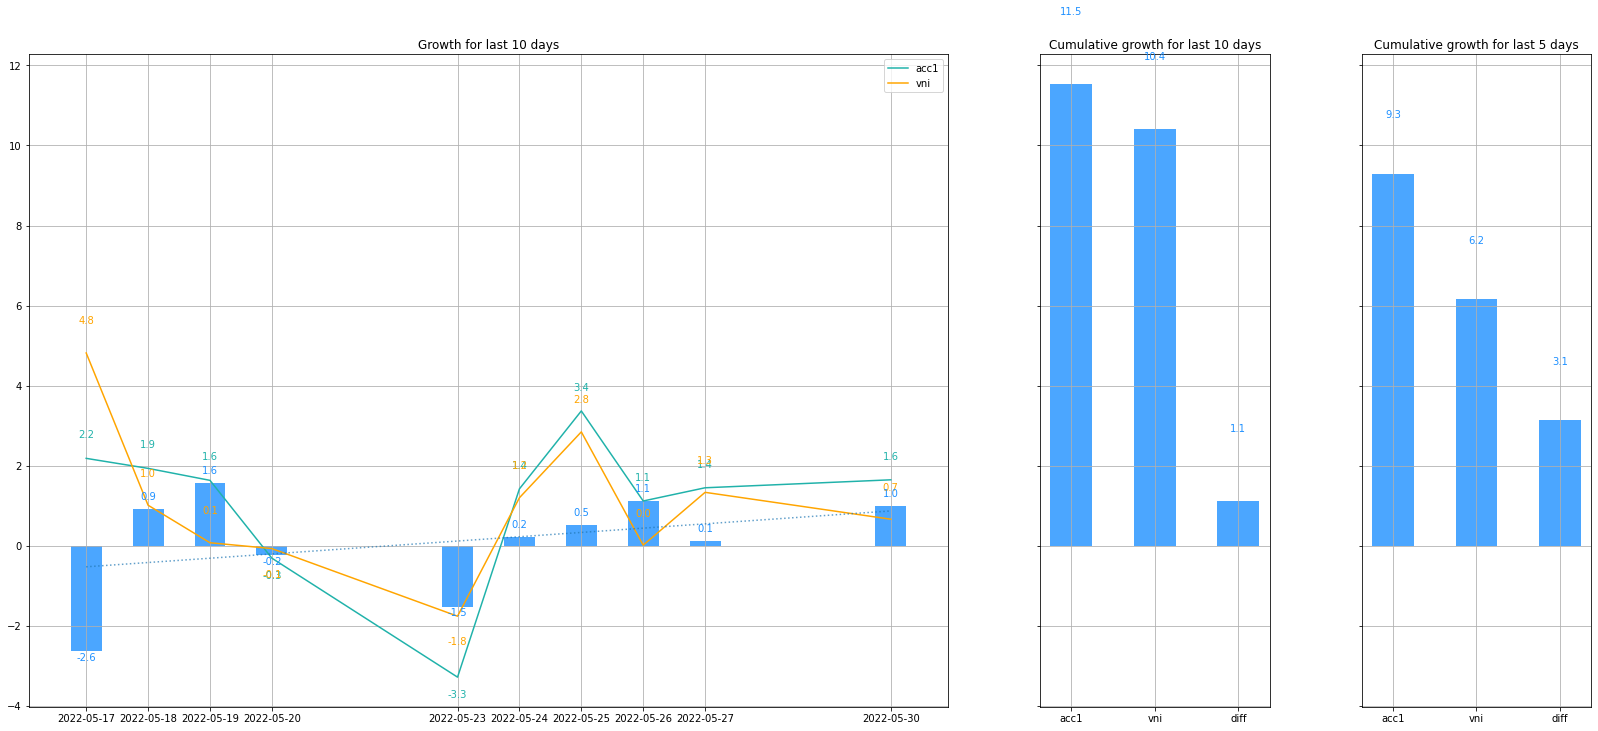

In [9]:
draw_utils.plot_recent_growth(
    user_df,
    num_days=10,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


In [10]:
# user_df.tail(10)


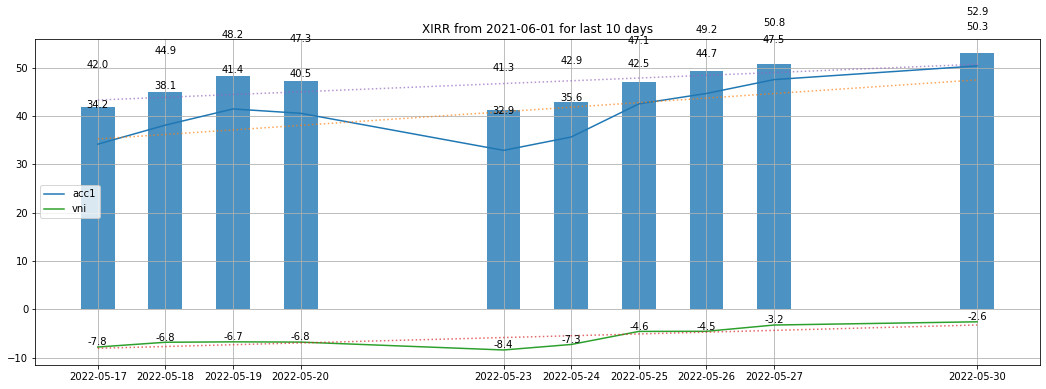

In [11]:
draw_utils.plot_recent_xirr(
    log_df=user_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date="2021-06-01",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


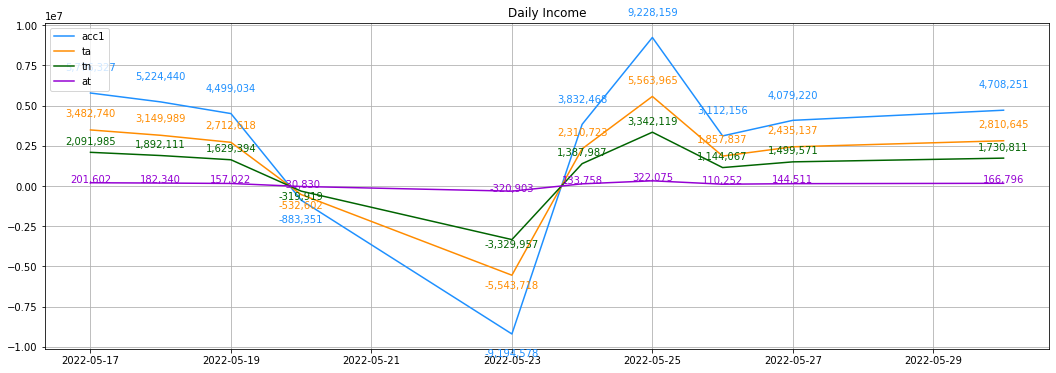

In [12]:
draw_utils.plot_recent_income(
    daily_df=user_df,
    num_days=10,
    name_l=[acc_name] + user_name_l,
)


### Diff distribution


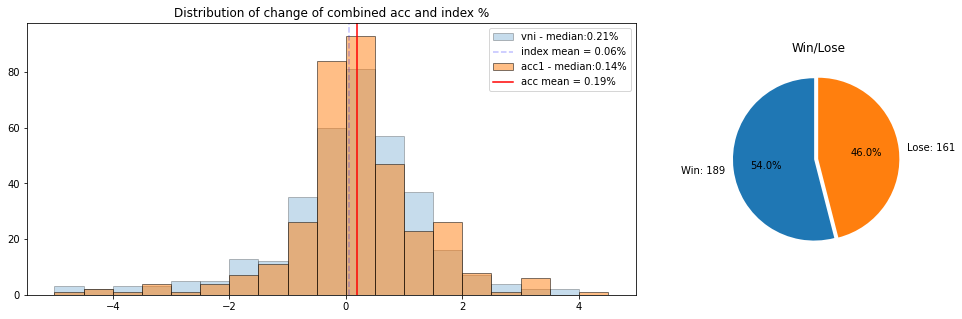

In [13]:
draw_utils.plot_daily_diff_p_distribution(
    user_df,
    acc_name=acc_name,
    index_name=compare_index,
)


### Growth XIRR


In [14]:
anchor_date = "2022-4-21"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    user_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=[acc_name],
    index_name_l=[compare_index],
)


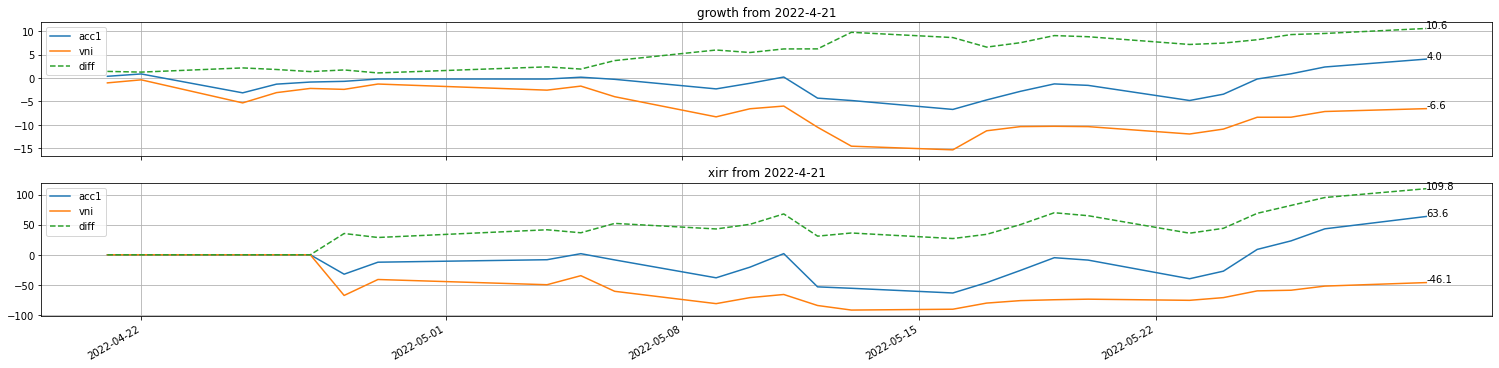

In [15]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


### Periodic


In [16]:
periodic_user_df = process_utils.add_period_cols(user_df)


#### Weekly


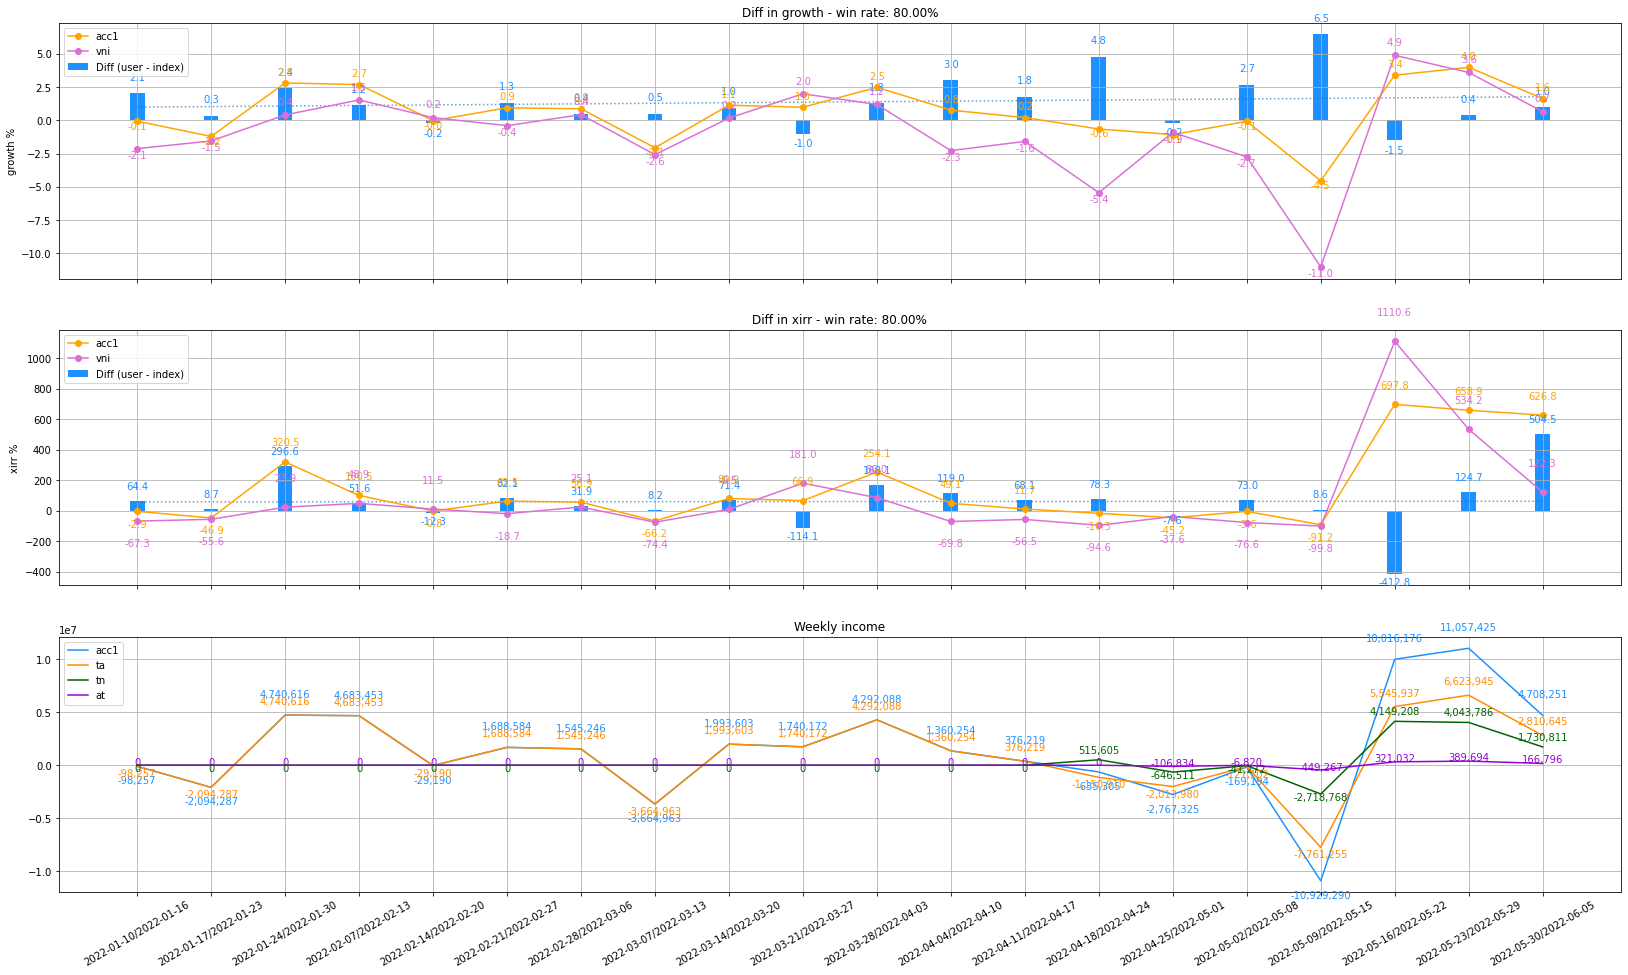

In [17]:
weekly_df = process_utils.get_period_df(
    period_symbol="W",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)
# Not enough space to plot every week
weekly_df = process_utils.filter_latest_x_rows(df=weekly_df, row_num=20)  # type: ignore

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=weekly_df,
    period_name="Weekly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Monthly


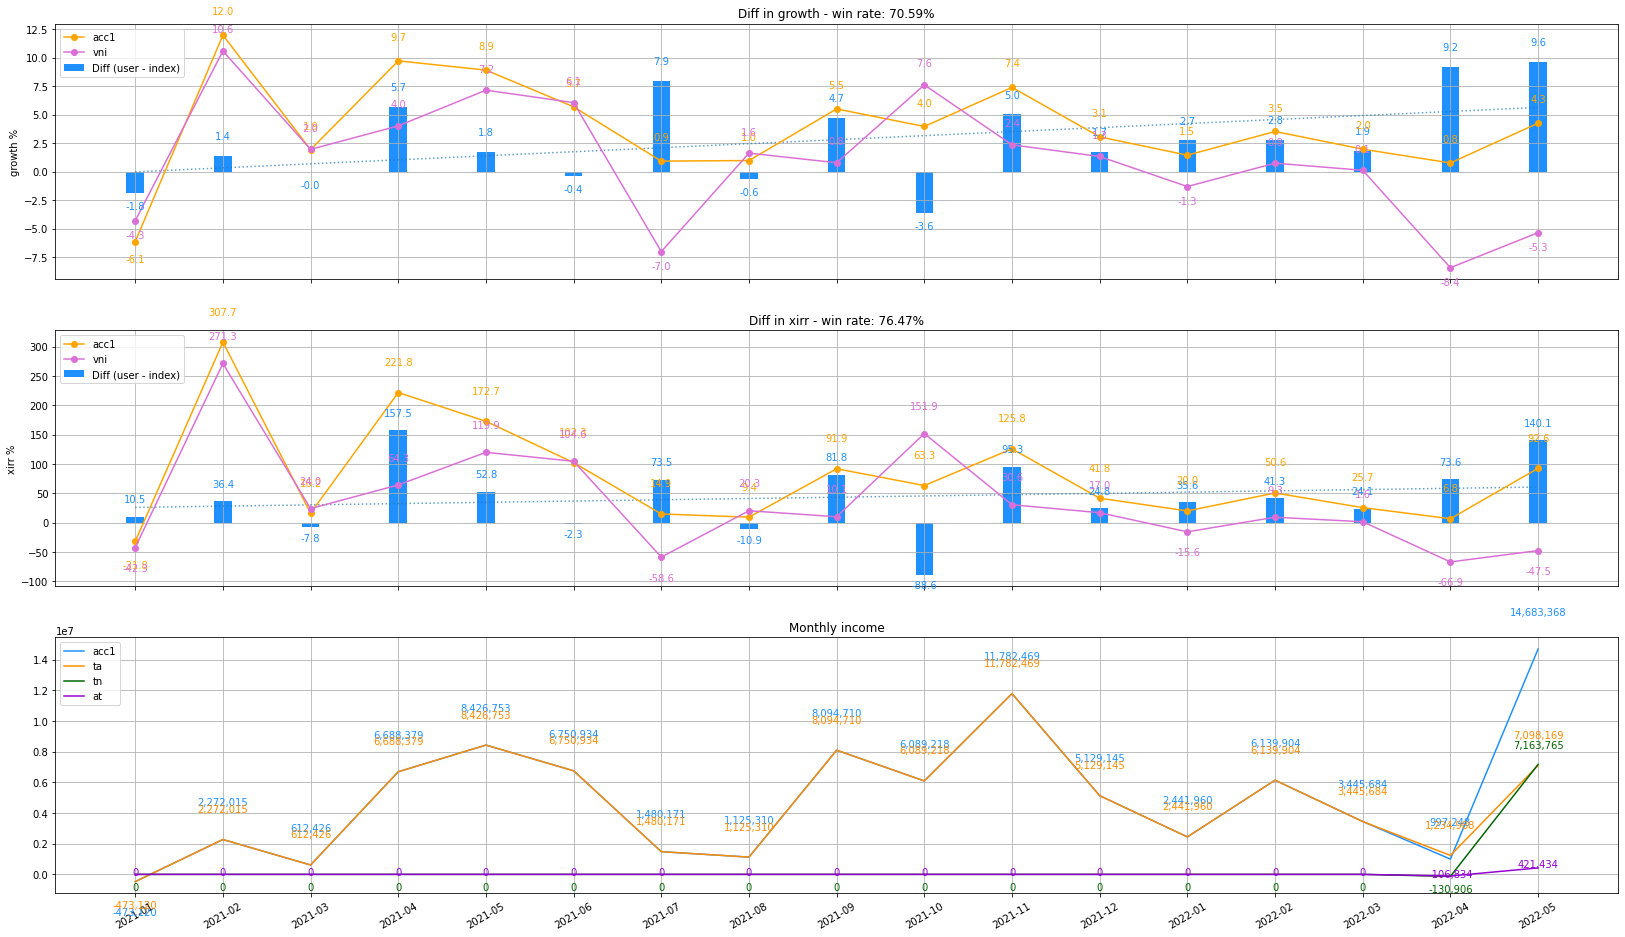

In [18]:
monthly_df = process_utils.get_period_df(
    period_symbol="M",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020-12
    monthly_df.drop(["2020-12"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=monthly_df,
    period_name="Monthly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Quarterly


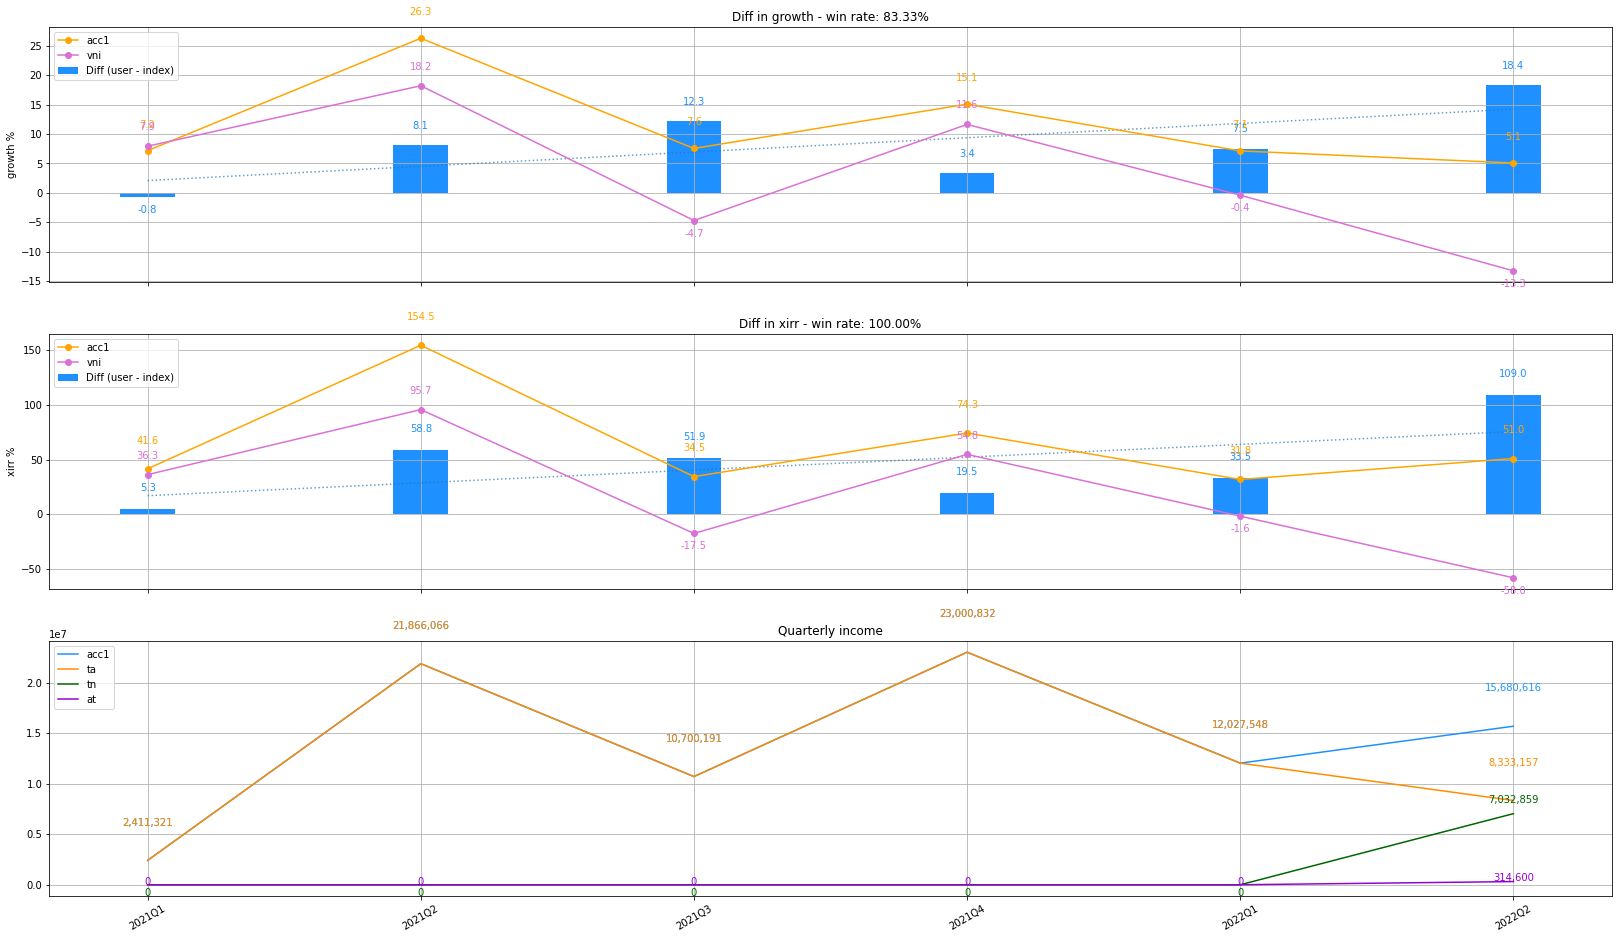

In [19]:
quaterly_df = process_utils.get_period_df(
    period_symbol="Q",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020Q4
    quaterly_df.drop(["2020Q4"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=quaterly_df,
    period_name="Quarterly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Yearly


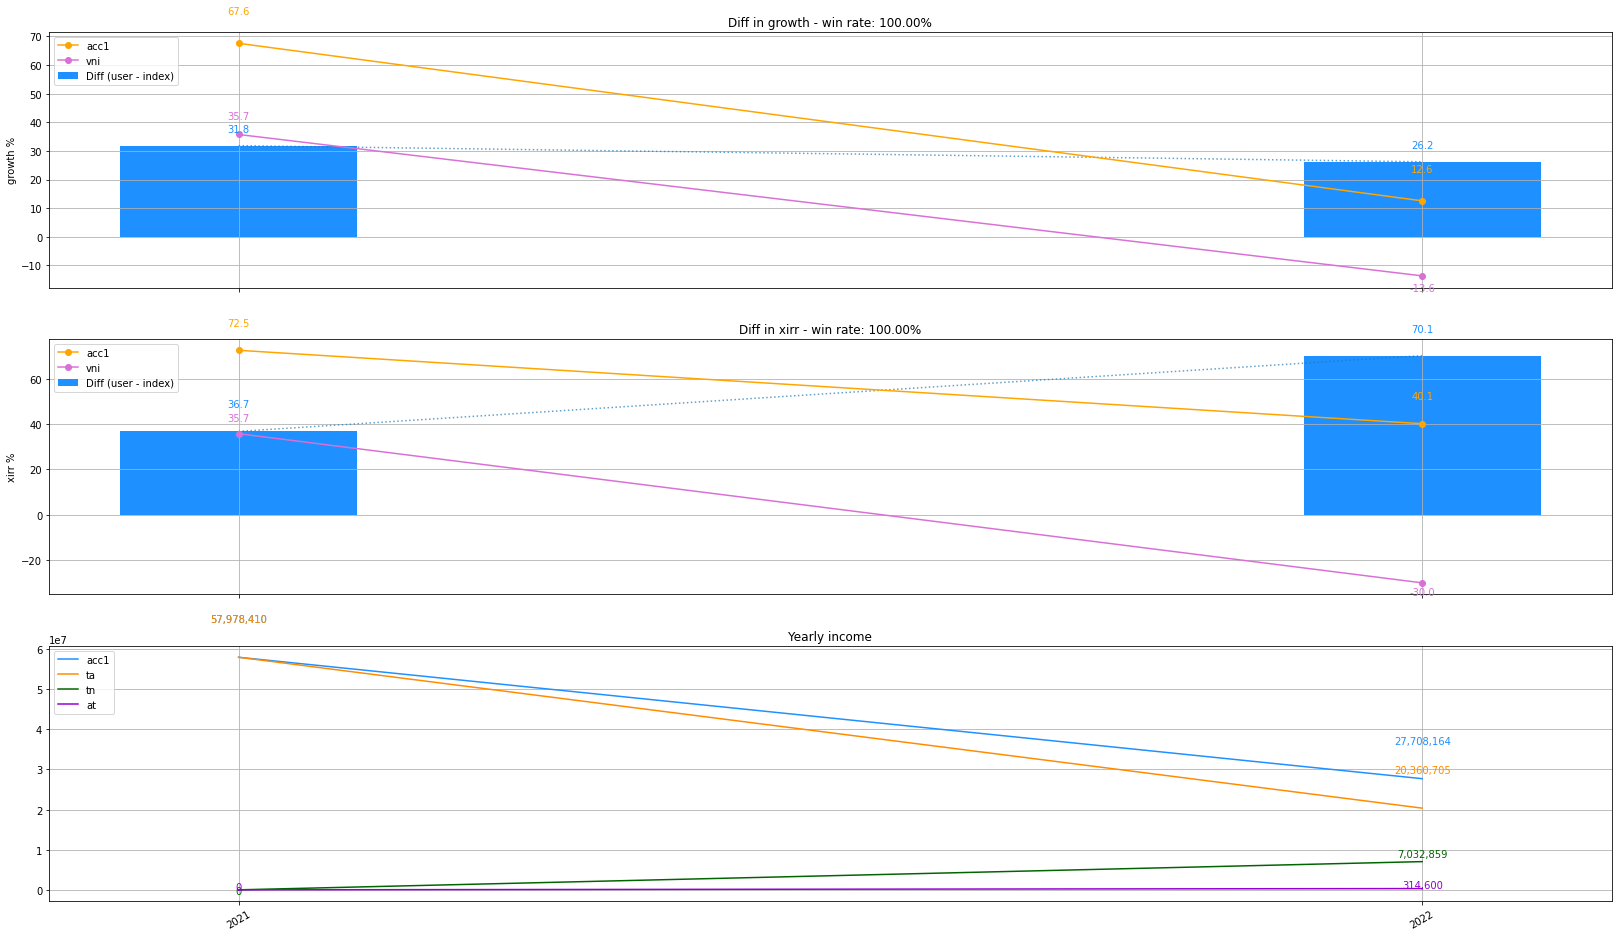

In [20]:
yearly_df = process_utils.get_period_df(
    period_symbol="Y",
    df=periodic_user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020
    yearly_df.drop(["2020"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=yearly_df,
    period_name="Yearly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


## Fee


In [21]:
processing_user_name = const.TN_USER_NAME
user_fee_p = const.USER_NAME_FEE_DICT[processing_user_name]
user_fee_anchor_date = const.USER_NAME_FEE_ANCHOR_DATE[processing_user_name]


In [22]:
user_df.tail()


,vni,vni_diff,acc1,acc1_diff,ta_cf,tn_cf,at_cf,acc1_cf,day_start,ta_day_start,ta_share,ta_diff,ta,tn_day_start,tn_share,tn_diff,tn,at_day_start,at_share,at_diff,at,acc1_diff_p,acc1_aux_diff_p,ta_diff_p,ta_aux_diff_p,tn_diff_p,tn_aux_diff_p,at_diff_p,at_aux_diff_p,vni_diff_p,vni_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-24,1233.38,14.57,274229195,3832468.0,0.0,0.0,0.0,0.0,270396727.0,1.630312e+08,0.602933,2.310723e+06,1.653419e+08,9.792831e+07,0.362165,1.387987e+06,9.931629e+07,9.437207e+06,0.034901,133758.259040,9.570966e+06,0.014173,1.014173,0.014173,1.014173,0.014173,1.014173,0.014173,1.014173,0.011954,1.011954
2022-05-25,1268.43,35.05,283457354,9228159.0,0.0,0.0,0.0,0.0,274229195.0,1.653419e+08,0.602933,5.563965e+06,1.709059e+08,9.931629e+07,0.362165,3.342119e+06,1.026584e+08,9.570966e+06,0.034901,322075.091556,9.893041e+06,0.033651,1.033651,0.033651,1.033651,0.033651,1.033651,0.033651,1.033651,0.028418,1.028418
2022-05-26,1268.57,0.14,282369510,3112156.0,4200000.0,0.0,0.0,4200000.0,279257354.0,1.667059e+08,0.596962,1.857837e+06,1.685637e+08,1.026584e+08,0.367612,1.144067e+06,1.038025e+08,9.893041e+06,0.035426,110252.015774,1.000329e+07,0.011144,1.011144,0.011144,1.011144,0.011144,1.011144,0.011144,1.011144,0.000110,1.000110
2022-05-27,1285.45,16.88,286448730,4079220.0,0.0,0.0,0.0,0.0,282369510.0,1.685637e+08,0.596962,2.435137e+06,1.709989e+08,1.038025e+08,0.367612,1.499571e+06,1.053020e+08,1.000329e+07,0.035426,144511.466580,1.014780e+07,0.014446,1.014446,0.014446,1.014446,0.014446,1.014446,0.014446,1.014446,0.013306,1.013306
2022-05-30,1293.92,8.47,291156981,4708251.0,0.0,0.0,0.0,0.0,286448730.0,1.709989e+08,0.596962,2.810645e+06,1.738095e+08,1.053020e+08,0.367612,1.730811e+06,1.070329e+08,1.014780e+07,0.035426,166795.675898,1.031460e+07,0.016437,1.016437,0.016437,1.016437,0.016437,1.016437,0.016437,1.016437,0.006589,1.006589


In [23]:
relevant_columns = [
    f"{compare_index}",
    f"{compare_index}_diff_p",
    processing_user_name,
    f"{processing_user_name}_day_start",
    f"{processing_user_name}_diff",
    f"{processing_user_name}_diff_p",
]

fee_df = user_df[relevant_columns]
fee_df = fee_df[fee_df.index >= user_fee_anchor_date]  # type: ignore


fee_df[f"{processing_user_name}_outperf_p"] = (
    fee_df[f"{processing_user_name}_diff_p"] - fee_df[f"{compare_index}_diff_p"]
)
fee_df[f"{processing_user_name}_outperf"] = (
    fee_df[f"{processing_user_name}_day_start"]
    * fee_df[f"{processing_user_name}_outperf_p"]
)
fee_df[f"{processing_user_name}_outperf_fee"] = (
    fee_df[f"{processing_user_name}_outperf"]
    * user_fee_p
)

fee_df.tail()


,vni,vni_diff_p,tn,tn_day_start,tn_diff,tn_diff_p,tn_outperf_p,tn_outperf,tn_outperf_fee
date,,,,,,,,,
2022-05-24,1233.38,0.011954,9.931629e+07,9.792831e+07,1.387987e+06,0.014173,0.002219,2.173241e+05,21732.412853
2022-05-25,1268.43,0.028418,1.026584e+08,9.931629e+07,3.342119e+06,0.033651,0.005233,5.197639e+05,51976.388931
2022-05-26,1268.57,0.000110,1.038025e+08,1.026584e+08,1.144067e+06,0.011144,0.011034,1.132736e+06,113273.583496
2022-05-27,1285.45,0.013306,1.053020e+08,1.038025e+08,1.499571e+06,0.014446,0.001140,1.183419e+05,11834.193196
2022-05-30,1293.92,0.006589,1.070329e+08,1.053020e+08,1.730811e+06,0.016437,0.009847,1.036961e+06,103696.139626


In [24]:
print(f"{processing_user_name}")


cum_profit_df = fee_df[f"{processing_user_name}_diff"].sum()
print(f"\t Cummulative daily profit: \t{cum_profit_df:,.0f}")

cum_outperf = fee_df[f"{processing_user_name}_outperf"].sum()
print(f"\t Cummulative outperf. profit: \t{cum_outperf:,.0f}")

if cum_profit_df>0:
    cum_fee = fee_df[f"{processing_user_name}_outperf_fee"].sum()
    print(f"\t Cummulative outferf. fee: \t{cum_fee:,.0f}")


tn
	 Cummulative daily profit: 	7,032,859
	 Cummulative outperf. profit: 	6,774,221
	 Cummulative outferf. fee: 	677,422
